In [4]:
print("Hello World")

Hello World


In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# define training sets
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train: {x_train}")
print(f"y_train: {y_train}")

x_train: [1. 2.]
y_train: [300. 500.]


In [8]:
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"x_train size: {x_train.shape[0]}")

x_train.shape: (2,)
x_train size: 2


In [9]:
# Denote training sample by ith x^(i), y^(i)
i = 0
x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y(({i}) = {x_i}, {y_i}")

(x^(0), y((0) = 1.0, 300.0


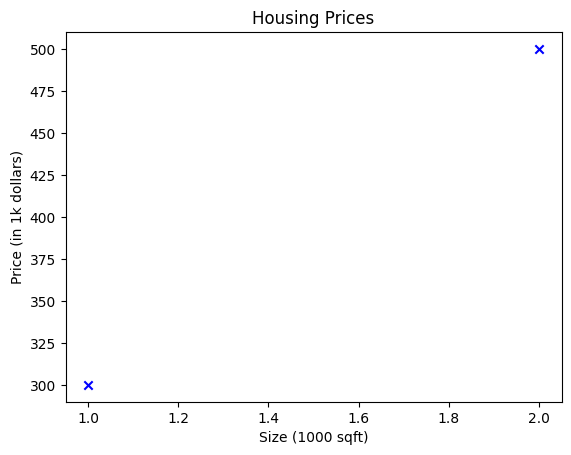

In [11]:
# Plot data
plt.scatter(x_train, y_train, marker='x', c='b')
plt.title("Housing Prices")
plt.ylabel("Price (in 1k dollars)")
plt.xlabel("Size (1000 sqft)")
plt.show()

In [10]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


In [6]:
# Define Model Computation y = wx + b
def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    
    return f_wb

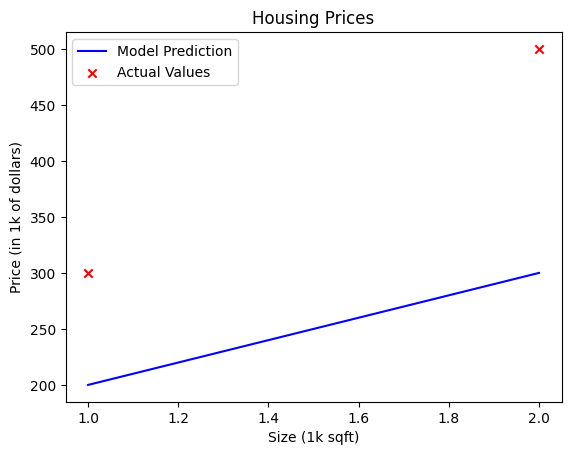

In [13]:
tmp_f_wb = compute_model_output(x_train, w, b)

# Plot model prediction line regression
plt.plot(x_train, tmp_f_wb, c='b', label='Model Prediction')

# Plot the actual data points
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Values')

plt.title("Housing Prices")
plt.ylabel("Price (in 1k of dollars)")
plt.xlabel("Size (1k sqft)")
plt.legend()
plt.show()

In [4]:
import math, copy

In [3]:
# Gradient descent: J(w, b) = 1/2m sum(f_wb(x^(i)) - y^(i))^2
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost
    return total_cost

In [2]:
# Compute Gradient
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [1]:
def gradient_descent(x, y, start_w, start_b, alpha, iters_no):
    cost_hist = []
    wb_hist = []
    w = start_w
    b = start_b

    for i in range(iters_no):
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        # step w, b
        w -= alpha * dj_dw
        b -= alpha * dj_db

        if i < 100000:
            cost_hist.append(compute_cost(x, y, w, b))
            wb_hist.append([w,b])

    return w, b, cost_hist, wb_hist



In [11]:
w_init = 0
b_init = 0

iters = 10000
tmp_alpha = 1.0e-2

# sample data
x_train = np.array([2.13, 3.78, 4.21, 0.96, 7.32, 1.45, 6.01, 8.73, 5.84, 9.28, 2.67, 8.15, 4.89, 3.24, 7.66, 5.57, 2.89, 0.77, 4.45, 1.13, 6.98, 1.91, 9.72, 3.32, 7.88, 8.57, 3.99, 9.45, 1.67, 4.77, 5.21, 0.64, 5.39, 8.02, 7.23, 6.67, 6.32, 3.01, 4.13, 0.88, 2.45, 8.89, 6.45, 3.57, 2.21, 7.12, 4.98, 5.88, 9.01])
y_train = np.array([11.34, 16.84, 18.61, 7.91, 24.68, 10.26, 22.12, 29.01, 21.35, 30.89, 11.46, 27.57, 18.08, 14.01, 26.49, 19.36, 13.11, 7.56, 17.82, 9.49, 24.54, 11.18, 31.25, 15.56, 26.19, 28.43, 16.77, 29.32, 10.55, 20.16, 19.21, 7.79, 20.57, 27.07, 24.05, 21.96, 21.22, 15.57, 18.42, 8.53, 12.84, 29.33, 22.35, 14.82, 11.49, 25.88, 17.39, 21.07, 29.33])


w_final, b_final, cost_hist, wb_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iters)

print(f"(w,b) calculated by gradient descent: ({w_final}, {b_final})")

(w,b) calculated by gradient descent: (2.5772400436501135, 6.184937778886169)


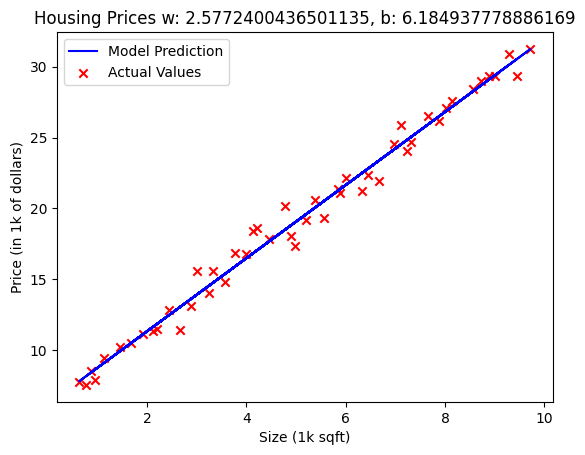

In [19]:
tmp_f_wb = compute_model_output(x_train, w_final, b_final)

# Plot model prediction line regression
plt.plot(x_train, tmp_f_wb, c='b', label='Model Prediction')

# Plot the actual data points
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Values')

plt.title(f"Housing Prices w: {w_final}, b: {b_final}")
plt.ylabel("Price (in 1k of dollars)")
plt.xlabel("Size (1k sqft)")
plt.legend()
plt.show()

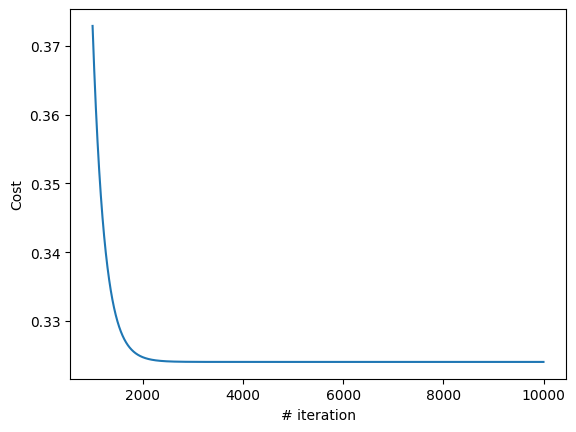

In [16]:
plt.plot(1000 + np.arange(len(cost_hist[1000:])), cost_hist[1000:])
plt.xlabel("# iteration")
plt.ylabel("Cost")
plt.show()

In [131]:
def predict(X, w, b):
    m, n = X.shape
    print(f"X Size m: {m}, n: {n}")
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = np.dot(X[i], w) + b

    return f_wb

In [54]:
def compute_cost_mv(X, y, w, b):
    m = X.shape[0]
    cost = 0
    for i in range(m):
        f_wb_i =  np.dot(X[i], w) + b
        cost += (f_wb_i - y[i])**2
    cost = cost / (2 * m)
    return cost

In [107]:
def compute_gradient_mv(X, y, w, b):
    m, n =  X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i, j]
        dj_db += err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [141]:
def gradient_descent_mv(X, y, initial_w, initial_b, alpha, iters_no):
    cost_hist = []
    w = initial_w.copy()
    b = initial_b

    for i in range(iters_no):
        dj_db, dj_dw = compute_gradient_mv(X, y, w, b)

        w -= alpha * dj_dw
        b -= alpha * dj_db

        if i < 100000:
            cost_hist.append(compute_cost_mv(X, y, w, b))

        print(f"w: {w}, b: {b}")

    return w, b, cost_hist

In [109]:
# Multiple Variables Linear Regression
n = 10
# Generate random x values (size in 1k sqft), number of bedrooms, number of bathrooms, and age of the house (in years)
x = np.zeros(shape=(n, 4))
y = np.zeros(n)

for i in range(x.shape[0]):
    x[i] = np.array([np.random.randint(500, 2500), np.random.randint(1, 5), np.random.randint(1, 2), np.random.randint(10, 50)])
    y[i] = np.random.randint(150, 2000)

print(x)
print(y)

[[9.270e+02 3.000e+00 1.000e+00 1.600e+01]
 [1.779e+03 2.000e+00 1.000e+00 4.700e+01]
 [1.735e+03 1.000e+00 1.000e+00 4.800e+01]
 [9.420e+02 4.000e+00 1.000e+00 4.500e+01]
 [6.940e+02 2.000e+00 1.000e+00 4.300e+01]
 [5.230e+02 1.000e+00 1.000e+00 3.300e+01]
 [1.585e+03 1.000e+00 1.000e+00 1.000e+01]
 [2.303e+03 2.000e+00 1.000e+00 4.600e+01]
 [7.510e+02 2.000e+00 1.000e+00 1.200e+01]
 [1.289e+03 4.000e+00 1.000e+00 3.400e+01]]
[1267. 1302.  600.  824. 1782. 1136.  348.  185.  896. 1254.]


In [142]:
# Initiailize params
start_b = 0
start_w = np.random.rand(4)
print(start_w)

# Gradient descent setting
iters = 1000
alpha = 1.0e-8

w_final, b_final, cost_hist_mv = gradient_descent_mv(x, y, start_w ,start_b, alpha, iters)

[0.35383867 0.75056564 0.64620026 0.32042851]
w: [0.35745018 0.75057845 0.64620529 0.32059257], b: 5.031111524405542e-06
w: [0.360994   0.75059117 0.64621028 0.32075501], b: 1.0016922958693344e-05
w: [0.36447142 0.75060379 0.64621522 0.32091588], b: 1.4958282682591397e-05
w: [0.36788368 0.75061633 0.64622012 0.32107519], b: 1.9856023186392172e-05
w: [0.37123199 0.75062877 0.64622497 0.32123297], b: 2.4710961368548346e-05
w: [0.37451756 0.75064112 0.64622979 0.32138927], b: 2.952389882769477e-05
w: [0.37774155 0.75065338 0.64623456 0.32154409], b: 3.429562214920114e-05
w: [0.38090513 0.75066556 0.64623929 0.32169748], b: 3.9026903186357764e-05
w: [0.38400942 0.75067765 0.64624398 0.32184945], b: 4.3718499336294986e-05
w: [0.38705554 0.75068966 0.64624863 0.32200004], b: 4.837115381073483e-05
w: [0.39004456 0.75070159 0.64625325 0.32214926], b: 5.298559590167171e-05
w: [0.39297758 0.75071344 0.64625782 0.32229716], b: 5.75625412420772e-05
w: [0.39585562 0.75072521 0.64626236 0.32244374],

X Size m: 10, n: 4
[ 514.49310297  990.47673709  966.14566135  535.10923967  397.65197183
  299.6870613   869.10083302 1275.59981958  416.22112217  719.75654387]


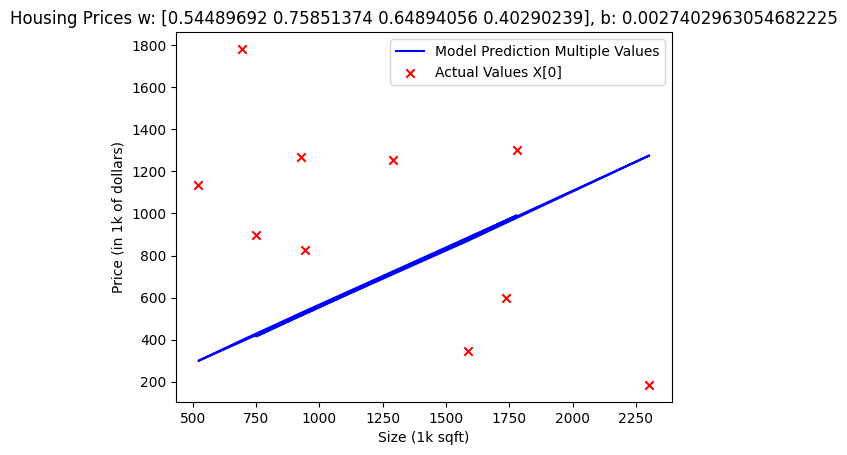

In [150]:
f_wb = predict(x, w_final, b_final)

print(f_wb)

# Plot model prediction line regression
plt.plot(x[: , 0], f_wb, c='b', label='Model Prediction Multiple Values')
plt.scatter(x[:, 0], y, marker='x', c='r', label="Actual Values X[0]")
plt.title(f"Housing Prices w: {w_final}, b: {b_final}")
plt.ylabel("Price (in 1k of dollars)")
plt.xlabel("Size (1k sqft)")
plt.legend()
plt.show()

[307856.76776103687, 306610.0161048433, 305409.50547805295, 304253.51999043336, 303140.4074241991, 302068.5768712848, 301036.4964582926, 300042.69115586125, 299085.7406693252, 298164.27740764467, 297276.984527704, 296422.59405118274, 295599.88505130244, 294807.68190686096, 294044.8526210546, 293310.30720268405, 292602.9961074302, 291921.90873697057, 291266.0719937897, 290634.5488896164, 290026.4372054992, 289440.86820160307, 288877.00537488156, 288334.04326284945, 287811.2062917448, 287307.74766743096, 286822.9483074572, 286356.1158127455, 285906.58347743715, 285473.7093354805, 285056.87524259795, 284655.4859923186, 284268.96846481354, 283896.77080731443, 283538.36164494546, 283193.22932083986, 282860.88116445317, 282540.8427870271, 282232.6574031986, 281935.88517778047, 281650.10259678273, 281374.9018617733, 281109.89030671224, 280854.6898364263, 280608.93638591946, 280372.27939974883, 280144.3813307177, 279924.91715717164, 279713.57391820697, 279510.0502661256, 279314.0560354985, 279

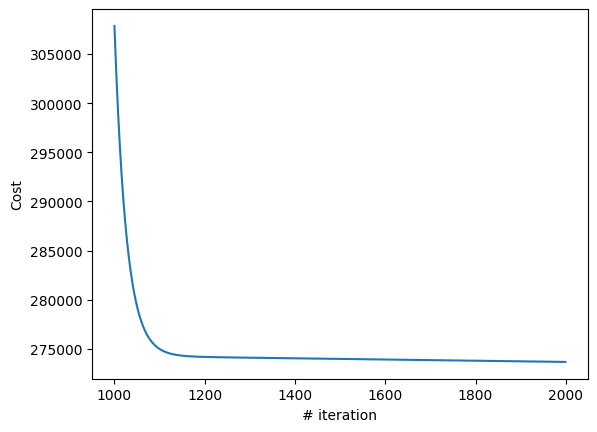

In [149]:
print(cost_hist_mv)

plt.plot(1000 + np.arange(len(cost_hist_mv)), cost_hist_mv)
plt.xlabel("# iteration")
plt.ylabel("Cost")
plt.show()